In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://drive.google.com/file/d/1a_Is-eD8SE-I1o3Xw6vW2HHijqQia4SM/view?usp=sharing

In [ ]:
id = '1a_Is-eD8SE-I1o3Xw6vW2HHijqQia4SM'

In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data1 = pd.read_csv('Filename.csv', encoding= 'latin')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#Data Overview 

In [ ]:
data1.head()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category
0,INC0010711,Network L1,BVABANTWA03 - Node down was triggered for Ci...,BVABANTWA03 - Node down,2019-03-16 01:26:01,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
1,INC0010712,Network L1,BVABANTGRAS01 - Node down was triggered for ...,BVABANTGRAS01 - Node down,2019-03-16 01:27:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
2,INC0010256,Network L2,BVNCLGSWA01 - Node down was triggered for Ci...,BVNCLGSWA01 - Node down,2019-03-04 07:55:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
3,INC0010363,ServiceNow Support,NaN,Test Incident,2019-03-06 12:28:37,testing,P4,NaN,ServiceNow
4,INC0010859,Network L2,Dell Monitor keeps blacking out all day every ...,Dell Monitor Intermittent Blackout,2019-03-21 10:06:43,Mistakenly created.,P3,NaN,Service Desk


In [ ]:

data1.shape

(185809, 9)

In [ ]:
data1.describe()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category
count,185809,185575,176449,185599,185809,185039,185583,150350,185536
unique,185809,133,127530,93865,185410,92170,4,505,20
top,INC0064938,Monitor IIMSS,BNGK-PSVORA-01 - BV_Linux_CPU_Utilization_Cr...,BNGK-PSVORA-01 - BV_Linux_CPU_Utilization_Cr...,2019-09-06 01:14:02,"Close Alert Received, Issue got resolved Autom...",P4,IIMSS User,Applications
freq,1,53164,3727,3727,4,49696,92076,19094,51059


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185809 entries, 0 to 185808
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Number             185809 non-null  object
 1   Assignment group   185575 non-null  object
 2   Description        176449 non-null  object
 3   Short description  185599 non-null  object
 4   Created            185809 non-null  object
 5   Resolution notes   185039 non-null  object
 6   Priority           185583 non-null  object
 7   Assigned To        150350 non-null  object
 8   Category           185536 non-null  object
dtypes: object(9)
memory usage: 12.8+ MB


In [ ]:
len(data1.Description.unique())

127531

In [ ]:
len(data1['Short description'].unique())

93866

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
df1 = data1.copy()

In [ ]:
df1.head()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category
0,INC0010711,Network L1,BVABANTWA03 - Node down was triggered for Ci...,BVABANTWA03 - Node down,2019-03-16 01:26:01,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
1,INC0010712,Network L1,BVABANTGRAS01 - Node down was triggered for ...,BVABANTGRAS01 - Node down,2019-03-16 01:27:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
2,INC0010256,Network L2,BVNCLGSWA01 - Node down was triggered for Ci...,BVNCLGSWA01 - Node down,2019-03-04 07:55:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
3,INC0010363,ServiceNow Support,NaN,Test Incident,2019-03-06 12:28:37,testing,P4,NaN,ServiceNow
4,INC0010859,Network L2,Dell Monitor keeps blacking out all day every ...,Dell Monitor Intermittent Blackout,2019-03-21 10:06:43,Mistakenly created.,P3,NaN,Service Desk


In [ ]:
# data1['Descript'] = data1['Short description']+' '+data1['Description']

In [ ]:
data1['Descript'] = data1['Short description']

In [ ]:
data1.head()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category,Descript
0,INC0010711,Network L1,BVABANTWA03 - Node down was triggered for Ci...,BVABANTWA03 - Node down,2019-03-16 01:26:01,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVABANTWA03 - Node down
1,INC0010712,Network L1,BVABANTGRAS01 - Node down was triggered for ...,BVABANTGRAS01 - Node down,2019-03-16 01:27:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVABANTGRAS01 - Node down
2,INC0010256,Network L2,BVNCLGSWA01 - Node down was triggered for Ci...,BVNCLGSWA01 - Node down,2019-03-04 07:55:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVNCLGSWA01 - Node down
3,INC0010363,ServiceNow Support,NaN,Test Incident,2019-03-06 12:28:37,testing,P4,NaN,ServiceNow,Test Incident
4,INC0010859,Network L2,Dell Monitor keeps blacking out all day every ...,Dell Monitor Intermittent Blackout,2019-03-21 10:06:43,Mistakenly created.,P3,NaN,Service Desk,Dell Monitor Intermittent Blackout


In [ ]:
data1.loc[0, 'Descript']

'BVABANTWA03  -  Node down'

In [ ]:
df = data1[['Descript','Assigned To','Resolution notes']]
df.head()

,Descript,Assigned To,Resolution notes
0,BVABANTWA03 - Node down,NaN,Resolution notes copied from Parent Incident: ...
1,BVABANTGRAS01 - Node down,NaN,Resolution notes copied from Parent Incident: ...
2,BVNCLGSWA01 - Node down,NaN,Resolution notes copied from Parent Incident: ...
3,Test Incident,NaN,testing
4,Dell Monitor Intermittent Blackout,NaN,Mistakenly created.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185809 entries, 0 to 185808
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Descript          185599 non-null  object
 1   Assigned To       150350 non-null  object
 2   Resolution notes  185039 non-null  object
dtypes: object(3)
memory usage: 4.3+ MB


In [ ]:
df.shape

(185809, 3)

https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition

In [ ]:
df['Assigned To'].value_counts()

IIMSS User                  19094
Ravindra Mutta               5106
Karthik Katineni             4473
Harithasri Penmetsa          4412
Chitrakshi Satija            4384
                            ...  
Kumar Saravanan                 1
Vasudev Palivela                1
Sukson Del Me-Nyiom             1
Satyanarayana Undrakunta        1
Mohsin Abbas                    1
Name: Assigned To, Length: 505, dtype: int64

In [ ]:
# Get the count of each value
value_counts = df['Assigned To'].value_counts()

In [ ]:
value_counts

IIMSS User                  19094
Ravindra Mutta               5106
Karthik Katineni             4473
Harithasri Penmetsa          4412
Chitrakshi Satija            4384
                            ...  
Kumar Saravanan                 1
Vasudev Palivela                1
Sukson Del Me-Nyiom             1
Satyanarayana Undrakunta        1
Mohsin Abbas                    1
Name: Assigned To, Length: 505, dtype: int64

In [ ]:
value_counts.dtype

dtype('int64')

In [ ]:
value_counts.shape

(505,)

# .**value_counts()**  returns an array with Index as the names of Professionals and their count as the 1 column.

In [ ]:
value_counts.index

Index(['IIMSS User', 'Ravindra Mutta', 'Karthik Katineni',
       'Harithasri Penmetsa', 'Chitrakshi Satija',
       'Gurukir Gundamaraju Gurukiran', 'James Gray', 'Rohith Ambati',
       'Judy Klein', 'Thomas Genyk',
       ...
       'Ravikumar Natarajan', 'Bondocea Adrian', 'Dandu Raju', 'Kent Banning',
       'Carl Rugenski', 'Kumar Saravanan', 'Vasudev Palivela',
       'Sukson Del Me-Nyiom', 'Satyanarayana Undrakunta', 'Mohsin Abbas'],
      dtype='object', length=505)

In [ ]:
# Select the values where the count is less than 2000 (or 5 if you like)
to_others = value_counts[value_counts <= 1000].index

In [ ]:
to_others

Index(['Yin Ma', 'Erin Shively', 'John Collins', 'Satish Yatam',
       'Matt Woodall', 'Daniel Wood', 'Xavier Archie', 'Andrew Parker',
       'Elise Cummings', 'Erica Wallace',
       ...
       'Ravikumar Natarajan', 'Bondocea Adrian', 'Dandu Raju', 'Kent Banning',
       'Carl Rugenski', 'Kumar Saravanan', 'Vasudev Palivela',
       'Sukson Del Me-Nyiom', 'Satyanarayana Undrakunta', 'Mohsin Abbas'],
      dtype='object', length=477)

In [ ]:
len(to_others)

477

In [ ]:
df.loc[df['Assigned To'].isin(to_others), 'Assigned To'] = 'Others'

In [ ]:
# Examples from Stack over flow
# df.loc[df['First Season'] > 1990, 'First Season'] = 1
# Keep rows where the city column is not in to_remove
#df = df[~df.city.isin(to_remove)]

In [ ]:
df['Assigned To'].value_counts()

Others                           77097
IIMSS User                       19094
Ravindra Mutta                    5106
Karthik Katineni                  4473
Harithasri Penmetsa               4412
Chitrakshi Satija                 4384
Gurukir Gundamaraju Gurukiran     3854
James Gray                        3430
Rohith Ambati                     3351
Judy Klein                        1892
Thomas Genyk                      1818
Priyanka Desai                    1734
Varalakshmi Bellapukonda          1430
Monica Koper                      1341
Ganesh Nagumalli                  1320
Dimple Mittal                     1271
Paul Cullen                       1246
Juanita Brown                     1209
Chantel Lewis                     1200
Kangibe Kaba                      1138
Louis Alvarado                    1132
Richard Bishop                    1104
Jody Cooper                       1086
Racelle Rebogio                   1082
David Lawson                      1054
Clara Steele             

In [ ]:
df.columns

Index(['Descript', 'Assigned To', 'Resolution notes'], dtype='object')

In [ ]:
Professional = df['Assigned To'].value_counts()

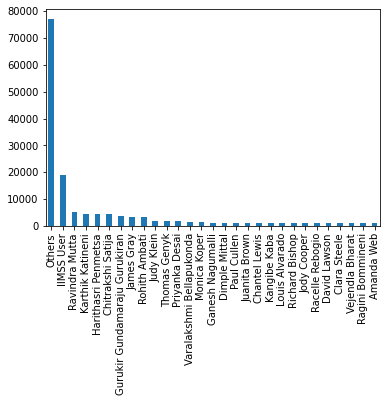

In [ ]:
Professional.plot(kind='bar')

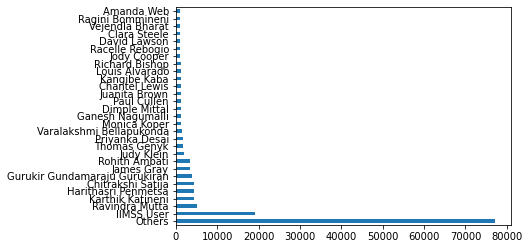

In [ ]:
Professional.plot(kind='barh')

Drop the Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(126091, 3)

Droppping the Others Category in - Assigned to COlumn

In [ ]:
df.drop(df.loc[df['Assigned To']=='Others'].index, inplace=True)

In [ ]:
df.shape

(51753, 3)

In [ ]:
Professional = df['Assigned To'].value_counts()

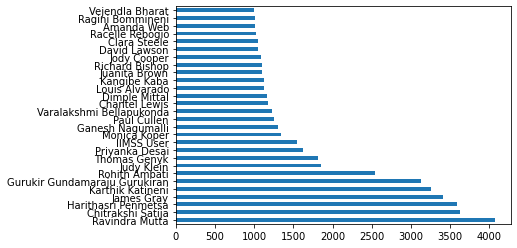

In [ ]:
Professional.plot(kind='barh')

In [ ]:
df.describe()

,Descript,Assigned To,Resolution notes
count,51752,49588,51554
unique,31761,28,31965
top,BOST-PWPMPC-01 - Custom - Percentage Logical...,Ravindra Mutta,"Close Alert Received, Issue got resolved Autom..."
freq,176,4072,2981


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51753 entries, 0 to 179209
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Descript          51752 non-null  object
 1   Assigned To       49588 non-null  object
 2   Resolution notes  51554 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(49390, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49390 entries, 38937 to 179209
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Descript          49390 non-null  object
 1   Assigned To       49390 non-null  object
 2   Resolution notes  49390 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


# Our data is prepared now

In [ ]:
df.columns

Index(['Descript', 'Assigned To', 'Resolution notes'], dtype='object')

In [ ]:
df['Assigned To'].unique()

array(['Amanda Web', 'Chantel Lewis', 'Chitrakshi Satija', 'Clara Steele',
       'David Lawson', 'Dimple Mittal', 'Ganesh Nagumalli',
       'Gurukir Gundamaraju Gurukiran', 'Harithasri Penmetsa',
       'IIMSS User', 'James Gray', 'Jody Cooper', 'Juanita Brown',
       'Judy Klein', 'Kangibe Kaba', 'Karthik Katineni', 'Louis Alvarado',
       'Monica Koper', 'Paul Cullen', 'Priyanka Desai', 'Racelle Rebogio',
       'Ragini Bommineni', 'Ravindra Mutta', 'Richard Bishop',
       'Rohith Ambati', 'Thomas Genyk', 'Varalakshmi Bellapukonda',
       'Vejendla Bharat'], dtype=object)

In [ ]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
# trying various different sample sizes - 10k , 50k or 100k 

df2 = df.sample(10000, random_state=1).copy()

#df2 = df.sample(50000, random_state=1).copy()

#df2 = df.sample(100000, random_state=1).copy()


In [ ]:
# Dropping unnecessary columns 
cleaned=df2.copy()
cleaned.head()

,Descript,Assigned To,Resolution notes
58318,'++WFH++ VPN - Not Able To Connect,David Lawson,"Expired password, reset password for user, use..."
173934,BIC - When clicking on install it says that it...,Thomas Genyk,I had her try it again. She was able to insta...
103725,"Outlook- error ""need password""",James Gray,"TPM Issue, shut down PC, unplugged all power a..."
39774,Active Directory- Active Account,Amanda Web,access was granted\r\nclosing ticket
117831,CH3E-PWVDPM-05 - Custom - DPM: Recovery poin...,Karthik Katineni,Backup has been resumed and completed successf...


In [ ]:
cleaned.rename(columns={'Descript': 'overview', 'Assigned To': 'original_title'}, inplace=True)

In [ ]:
cleaned.head()

,overview,original_title,Resolution notes
58318,'++WFH++ VPN - Not Able To Connect,David Lawson,"Expired password, reset password for user, use..."
173934,BIC - When clicking on install it says that it...,Thomas Genyk,I had her try it again. She was able to insta...
103725,"Outlook- error ""need password""",James Gray,"TPM Issue, shut down PC, unplugged all power a..."
39774,Active Directory- Active Account,Amanda Web,access was granted\r\nclosing ticket
117831,CH3E-PWVDPM-05 - Custom - DPM: Recovery poin...,Karthik Katineni,Backup has been resumed and completed successf...


In [ ]:
cleaned['overview'].head()

58318                   '++WFH++ VPN - Not Able To Connect 
173934    BIC - When clicking on install it says that it...
103725                       Outlook- error "need password"
39774                      Active Directory- Active Account
117831    CH3E-PWVDPM-05  -  Custom - DPM: Recovery poin...
Name: overview, dtype: object

In [ ]:
cleaned.reset_index(inplace=True)

In [ ]:
cleaned.head()

,index,overview,original_title,Resolution notes
0,58318,'++WFH++ VPN - Not Able To Connect,David Lawson,"Expired password, reset password for user, use..."
1,173934,BIC - When clicking on install it says that it...,Thomas Genyk,I had her try it again. She was able to insta...
2,103725,"Outlook- error ""need password""",James Gray,"TPM Issue, shut down PC, unplugged all power a..."
3,39774,Active Directory- Active Account,Amanda Web,access was granted\r\nclosing ticket
4,117831,CH3E-PWVDPM-05 - Custom - DPM: Recovery poin...,Karthik Katineni,Backup has been resumed and completed successf...


In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,3),min_df=3,analyzer='word')

#Replace NaN with an empty string
#cleaned['overview'] = cleaned['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(cleaned['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(10000, 6170)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
print(cosine_sim.shape)
print(cosine_sim[1])

(10000, 10000)
[0.         1.         0.         ... 0.         0.         0.01901234]


In [ ]:
#Construct a reverse map of indices and Assigned to - Professionals
indices = pd.Series(cleaned.index, index=cleaned['original_title']).drop_duplicates()

In [ ]:
indices

original_title
David Lawson                        0
Thomas Genyk                        1
James Gray                          2
Amanda Web                          3
Karthik Katineni                    4
                                 ... 
Gurukir Gundamaraju Gurukiran    9995
Karthik Katineni                 9996
Thomas Genyk                     9997
Judy Klein                       9998
Chitrakshi Satija                9999
Length: 10000, dtype: int64

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the Professional that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all Professional with that Professional
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the Professional name based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar Professional names
    sim_scores = sim_scores[1:11]

    # Get the Professional indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar Professionals
    return cleaned['original_title'].iloc[movie_indices]

In [ ]:
# Getting the recommendation
get_recommendations('David Lawson')